### Liberies Importing

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset importing

In [138]:
df = pd.read_csv('vehicles.csv',index_col='id')

In [141]:
df.head()

,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
id,,,,,,,,,,,,,,,,,,,,,
7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426880 entries, 7222695916 to 7301591129
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   url           426880 non-null  object 
 1   region        426880 non-null  object 
 2   region_url    426880 non-null  object 
 3   price         426880 non-null  int64  
 4   year          425675 non-null  float64
 5   manufacturer  409234 non-null  object 
 6   model         421603 non-null  object 
 7   condition     252776 non-null  object 
 8   cylinders     249202 non-null  object 
 9   fuel          423867 non-null  object 
 10  odometer      422480 non-null  float64
 11  title_status  418638 non-null  object 
 12  transmission  424324 non-null  object 
 13  VIN           265838 non-null  object 
 14  drive         296313 non-null  object 
 15  size          120519 non-null  object 
 16  type          334022 non-null  object 
 17  paint_color   296677 non-null  object 
 

In [143]:
df.shape

(426880, 25)

In [144]:
df.describe()

,price,year,odometer,county,lat,long
count,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


### Data Cleaning

### check duplicate

In [145]:
df.duplicated().sum()

0

In [146]:
#drop columns we will not use in the EDA
df.drop(columns = ['url','region_url','image_url','description'],inplace=True)

### Handling null values

In [147]:
#check columns for null values
df.isna().sum()/len(df)

region          0.000000
price           0.000000
year            0.002823
manufacturer    0.041337
model           0.012362
condition       0.407852
cylinders       0.416225
fuel            0.007058
odometer        0.010307
title_status    0.019308
transmission    0.005988
VIN             0.377254
drive           0.305863
size            0.717675
type            0.217527
paint_color     0.305011
county          1.000000
state           0.000000
lat             0.015342
long            0.015342
posting_date    0.000159
dtype: float64

In [148]:
#drop columns with %70+ Missing values (county, size)
df.drop(columns=['county','size'],inplace=True)

In [149]:
#Replace numberic columns' null values with the mean
numeric_col = ['year','odometer','lat', 'long']
for col in numeric_col:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mean())

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426880 entries, 7222695916 to 7301591129
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          426880 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      426880 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  VIN           265838 non-null  object 
 12  drive         296313 non-null  object 
 13  type          334022 non-null  object 
 14  paint_color   296677 non-null  object 
 15  state         426880 non-null  object 
 16  lat           426880 non-null  float64
 17  long          426880 non-null  float64
 

In [151]:
cat_col = [col for col in df.columns if df[col].isna().sum() > 0 ]
cat_col

['manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'title_status',
 'transmission',
 'VIN',
 'drive',
 'type',
 'paint_color',
 'posting_date']

In [152]:
#replacing the missing values with the mode
for col in cat_col:
    df[col] = df[col].fillna(df[col].mode()[0])

- Back to the `descripe` step, we can find that the minimum car price is `0` which is not a reseonable value.

In [153]:
# minimum price
df['price'].min()

0

In [154]:
#imputing the minimum price with the mean
df['price'] = df['price'].apply(lambda x: df['price'].mean() if x == 0 else x)

- The datatype of the `year` column should be changed to str

In [157]:
df['year'] = df['year'].astype('int').astype('str')

### EDA

- ### What is the most expensive car?

In [98]:
print('The most expensice car VIN is:',df.loc[df['price']== df['price'].max(),'VIN'].iloc[0])

The most expensice car VIN is: 1FMJU1JT1HEA52352


- ### What is the distribution of the price?

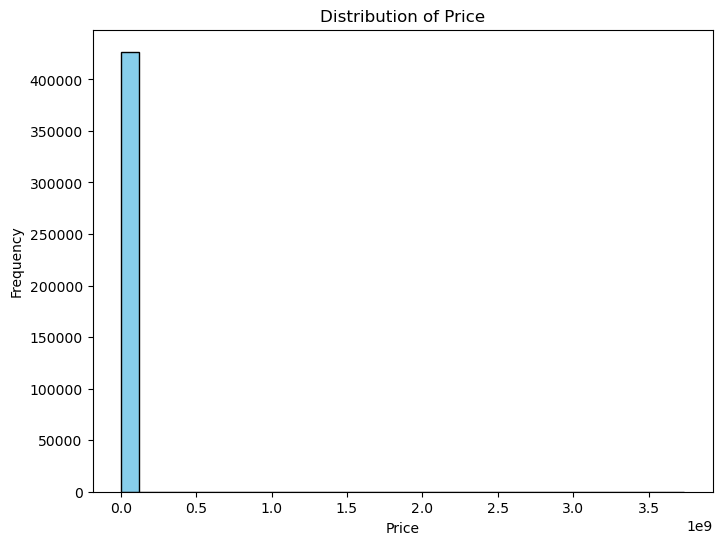

In [105]:
plt.figure(figsize=(8, 6))
plt.hist(df['price'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()

In [108]:
#Remove the outliers
df_filtered = df[df['price'] < df['price'].quantile(0.99)]

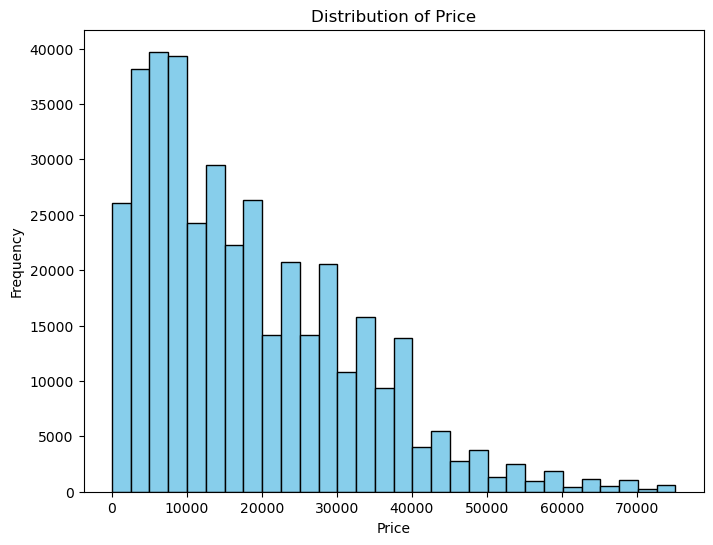

In [109]:
plt.figure(figsize=(8, 6))
plt.hist(df_filtered['price'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()

- ### Number of cars in each type

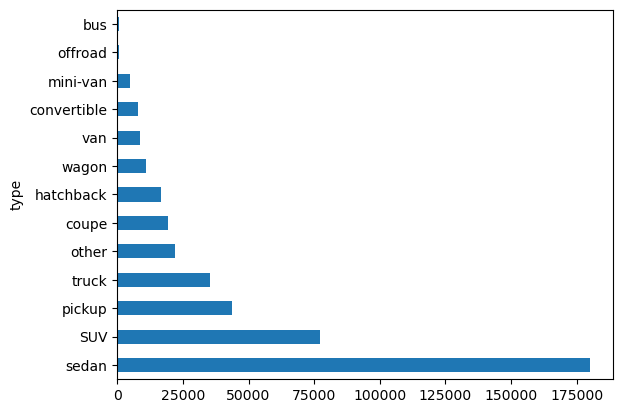

In [112]:
np_cars = df['type'].value_counts().plot(kind= 'barh')

- ### Price average by each region

In [120]:
df.groupby('region')['price'].mean().sort_values(ascending = False)[:10]

region
frederick          4.925301e+06
delaware           3.209256e+06
humboldt county    2.911129e+06
modesto            1.406687e+06
knoxville          1.376416e+06
eugene             1.277038e+06
south jersey       1.035322e+06
stillwater         6.598857e+05
birmingham         6.226576e+05
indianapolis       5.578140e+05
Name: price, dtype: float64

- ### Price average per year

In [161]:
df.groupby('year')['price'].mean().sort_values(ascending = False)[:10]

year
1960    1.648183e+07
1989    2.479538e+06
2000    1.703014e+06
1902    1.666666e+06
1999    1.616768e+06
2021    1.351363e+06
1980    4.299888e+05
1965    3.602372e+05
2007    2.646613e+05
1993    1.517279e+05
Name: price, dtype: float64

- ### change of price over the last 20 years

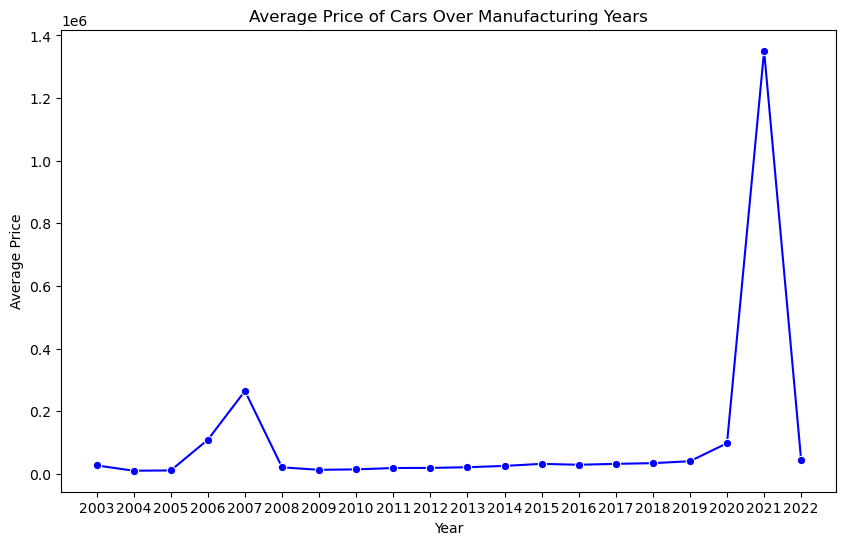

In [175]:
price_by_year = df.groupby('year')['price'].mean()[-20:]
plt.figure(figsize=(10,6))
sns.lineplot(x=price_by_year.index, y=price_by_year.values, marker='o', color='b')
plt.title('Average Price of Cars Over Manufacturing Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()